In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe

# center SiPMs
sipm = SiPM(type="plane",position=[0,4,z_plane],qeff=0.25)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[0,-4,z_plane],qeff=0.25)
geo.add_sipm(sipm)

# ring SiPMs
n_circ = 6
r = 17.5
for phi in np.linspace(0,2*np.pi,n_circ,endpoint=False):
    sipm = SiPM(type="plane",position=[r*np.cos(phi),r*np.sin(phi),z_plane],qeff=0.25)
    geo.add_sipm(sipm)

In [4]:
n_mc = 1000
sims = []
xbins = 2
ybins = 2
xmax = 20
ymax = 20

for x in np.linspace(0,xmax,xbins,endpoint=True):
    for y in np.linspace(0,ymax,ybins,endpoint=True):
        print("simulate @ x= ",x," mm", "simulate @ y= ",y, "mm")
        sim = Simulator(geo=geo,uv_position=[x,y,0],n_mc=n_mc)
        sim.generate_events()
        sims.append(sim)

simulate @ x=  0.0  mm simulate @ y=  0.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 0. 0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00125  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00150  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.00025  qe = 0.250
 4  (x,y,z) = (-8.7, 15.2, 10.0) p(hit) = 0.00000  qe = 0.250
 5  (x,y,z) = (-17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 6  (x,y,z) = (-8.8, -15.2, 10.0) p(hit) = 0.00025  qe = 0.250
 7  (x,y,z) = ( 8.7, -15.2, 10.0) p(hit) = 0.00050  qe = 0.250
event generation done
simulate @ x=  0.0  mm simulate @ y=  20.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [ 0. 20.  0.]
 0  (x,y,z) = ( 0.0,  4.0, 10.0) p(hit) = 0.00025  qe = 0.250
 1  (x,y,z) = ( 0.0, -4.0, 10.0) p(hit) = 0.00000  qe = 0.250
 2  (x,y,z) = (17.5,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 3  (x,y,z) = ( 8.8, 15.2, 10.0) p(hit) = 0.0

In [5]:
recs = []
for sim in sims:
    rec = Reconstruction(sim=sim)
    rec.emulate_events(n_uv=50000,n_event=10,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
    recs.append(rec)

generated  0  events
reconstruction done
              I       chi2       fval  status  xgen        xr  ygen        yr
0  57681.169792  64.481252  38.463975     1.0   0.0  2.030990   0.0 -2.274655
1  50341.404917  57.443683  34.677363     1.0   0.0  1.925715   0.0 -2.317302
2  54254.452565  61.232994  37.519186     1.0   0.0  2.916655   0.0 -2.351529
3  57397.968760  74.084657  47.981989     1.0   0.0  1.865750   0.0 -1.870437
4  54267.804553  65.220980  40.762299     1.0   0.0  2.333157   0.0 -0.848289
5  52835.191375  60.796204  37.957871     1.0   0.0  3.244427   0.0 -2.096296
6  52212.138341  61.022134  37.532692     1.0   0.0  2.328946   0.0 -1.336313
7  56788.596635  64.073586  38.717162     1.0   0.0  2.129251   0.0 -2.900182
8  53522.893678  75.881339  52.665615     1.0   0.0  3.261729   0.0 -1.487545
9  46176.969950  55.757357  35.211363     1.0   0.0  2.653787   0.0 -1.258237
generated  0  events
reconstruction done
               I       chi2       fval  status  xgen        

[0, 4, 10]
[0, -4, 10]
[17.5, 0.0, 10]
[8.750000000000002, 15.155444566227676, 10]
[-8.749999999999996, 15.155444566227677, 10]
[-17.5, 2.1431318985078682e-15, 10]
[-8.750000000000007, -15.155444566227672, 10]
[8.749999999999988, -15.155444566227683, 10]
hello


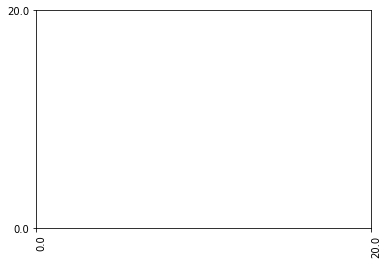

In [6]:
ana = Analysis(recs=recs, xsize=xbins, ysize=ybins, xmax= xmax, ymax=ymax)

ana.merge()
ana.plot(type = "xdif")

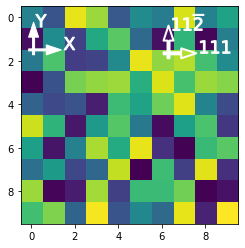

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDirectionArrows
import matplotlib.font_manager as fm

fig, ax = plt.subplots()
ax.imshow(np.random.random((10, 10)))

simple_arrow = AnchoredDirectionArrows(ax.transAxes, 'X', 'Y')
ax.add_artist(simple_arrow)

high_contrast_part_1 = AnchoredDirectionArrows(
                            ax.transAxes,
                            '111', r'11$\overline{2}$',
                            loc='upper right',
                            arrow_props={'ec': 'w', 'fc': 'none', 'alpha': 1,
                                         'lw': 2}
                            )
ax.add_artist(high_contrast_part_1)

In [19]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText


fig, ax = plt.subplots(figsize=(3, 3))

at = AnchoredText("", prop=dict(size=15), frameon=True, loc='upper left')

ax.add_artist(at)
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")


sq = plt.Rectangle(xy=(xs[0] - dx / 2, xs[1] - dx / 2),
                    height=dx,
                    width=dx,
                    fill=False, color='blue')
            ax.add_artist(sq)

plt.show()


IndentationError: unexpected indent (<ipython-input-19-1a129f6bf47a>, line 17)